In [1]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [2]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [3]:
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [4]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [5]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [6]:
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [7]:
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [8]:
from sklearn.impute import SimpleImputer
import numpy as np
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [9]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [10]:
import pandas as pd
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']
])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [11]:
size_mapping = {'XL':3, 'L':2, 'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [12]:
inv_size_mapping = {v:k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [13]:
import numpy as np
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [14]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [15]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [16]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [17]:
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

In [18]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [19]:
from sklearn.preprocessing import OneHotEncoder
X = df[['color', 'size', 'price']].values
print(X[:, 0])
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1,1)).toarray()

['green' 'red' 'blue']


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [20]:
from sklearn.compose import ColumnTransformer
X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([('onehot', OneHotEncoder(), [0]), ('nothing', 'passthrough', [1,2])])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [21]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [22]:
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [23]:
color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([('onehot', color_ohe, [0]), ('nothing', 'passthrough', [1,2])])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

In [24]:
df['x > M'] = df['size'].apply(lambda x:1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x:1 if x == 'XL' else 0)
del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,0,0
2,blue,15.3,class2,0,0


In [25]:
import pandas as pd
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']
])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [26]:
df_wine= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [27]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [28]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
print('Class label', np.unique(df_wine['Class label']))

df_wine.head()

Class label [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [29]:
from sklearn.model_selection import train_test_split
X, y= df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [30]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [31]:
ex = np.array([0,1,2,3,4,5])
print('standardized: ',(ex-ex.mean() / ex.std()))
print('normalized: ', (ex-ex.min())/ (ex.max() - ex.min()))

standardized:  [-1.46385011 -0.46385011  0.53614989  1.53614989  2.53614989  3.53614989]
normalized:  [0.  0.2 0.4 0.6 0.8 1. ]


In [32]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression(penalty='l1', C=1, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy: ', lr.score(X_train_std, y_train))
print('Test accuracy: ', lr.score(X_test_std, y_test))

Training accuracy:  1.0
Test accuracy:  1.0


In [34]:
lr.intercept_

array([-1.26396114, -1.21587005, -2.37127706])

In [35]:
lr.coef_

array([[ 1.24657134,  0.18054016,  0.74649243, -1.16406063,  0.        ,
         0.        ,  1.15983797,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55853937,  2.50852124],
       [-1.53748686, -0.38692051, -0.99528539,  0.36473598, -0.05943618,
         0.        ,  0.66788706,  0.        ,  0.        , -1.93383939,
         1.23406264,  0.        , -2.23161931],
       [ 0.13503154,  0.16950985,  0.35788197,  0.        ,  0.        ,
         0.        , -2.43439532,  0.        ,  0.        ,  1.56233638,
        -0.81696044, -0.49728778,  0.        ]])

coef_[1]:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
coef_[1]:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
coef_[1]:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
coef_[1]:  [-0.76611527 -0.04063145  0.          0.          0.          0.
  0.          0.          0.         -0.8239872   0.00697554  0.06465689
 -0.41580242]
coef_[1]:  [-1.53722377 -0.38703221 -0.99513708  0.36493139 -0.05955851  0.
  0.66795612  0.          0.         -1.93393651  1.23386892  0.
 -2.23181947]
coef_[1]:  [-2.69263309 -1.09953732 -2.84331945  1.43730115  0.          0.
  1.88048254  0.96971898  0.         -6.06540983  2.38415618  0.
 -5.36610108]
coef_[1]:  [ -4.33653058  -1.99295502  -5.00694069   2.60767527  -0.14802288
   0.           3.42348514   2.00245197   0.         -12.4369473
   3.93535103   0.13787688 -10.72314817]
coef_[1]:  [ -6.05087649  -2.8443507   -6.94834589   3.7888395   -0.97591326
   0.           4.62330715   2.37537588  -0.47246688 -17.70634852
   5.3320452    0.69654624 -14.78790042]
coef

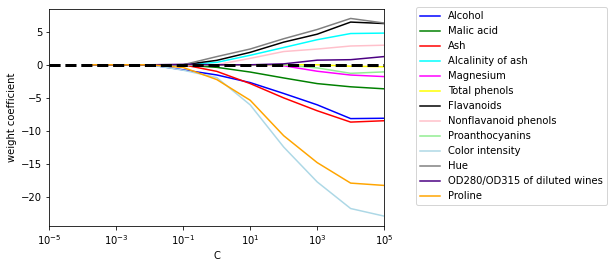

In [36]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
colors= ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    print('coef_[1]: ', lr.coef_[1])
    params.append(10.**c)
    
weights = np.array(weights)
for column , color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column + 1], color = color)
    
plt.axhline(0, color='black', linestyle='--', lw=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc = 'upper center', bbox_to_anchor = (1.38, 1.03), ncol=1, fancybox=True)
plt.show()

In [37]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
    
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = estimator
        self.k_features  = k_features
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_  = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim -1):
                score = self._calc_score(X_train , y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
            
        self.k_scores_ = self.scores_[
            -1
        ]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score= self.scoring(y_test, y_pred)
        return score

In [38]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

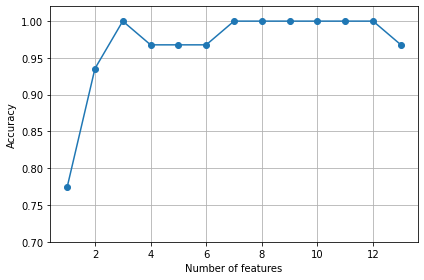

In [39]:
k_feat  = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7,1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [40]:
k3 = list(sbs.subsets_[-3])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [41]:
knn.fit(X_train_std, y_train)
print('Training accuracy: ', knn.score(X_train_std, y_train))
print('Test accuracy: ', knn.score(X_test_std, y_test))

Training accuracy:  0.967741935483871
Test accuracy:  0.9629629629629629


In [42]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy: ', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy: ', knn.score(X_test_std[:, k3], y_test))

Training accuracy:  0.9516129032258065
Test accuracy:  0.9259259259259259


 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


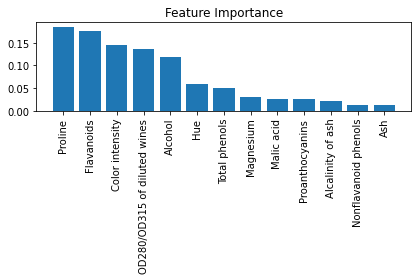

In [43]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) % -*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align = 'center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [44]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number od features that meet this threshold criterion: ', X_selected.shape[1])

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

Number od features that meet this threshold criterion:  5
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = df_wine.iloc[:, 1:].values ,df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test  =train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [46]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


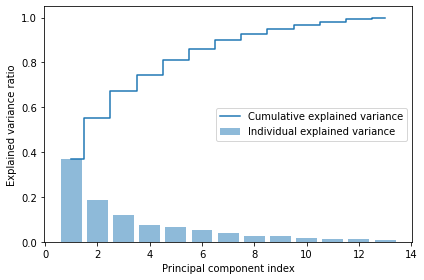

In [48]:
tot =sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [49]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k:k[0], reverse=True)

In [50]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [51]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [52]:
X_train_pca = X_train_std.dot(w)

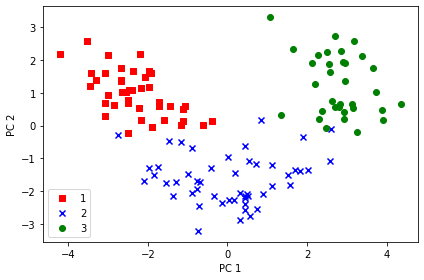

In [55]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l,1], c=c, label=l, marker=m)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [63]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier,  resolution=0.02):
    markers = ('s' ,'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1 , X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y = X[y==cl, 1], alpha=0.6, color=cmap(idx), edgecolor='black', marker=markers[idx], label=cl)

/var/folders/tl/3mcdykwx5g145dz_cpc1vdxc0000gn/T/ipykernel_79576/1341771559.py:15: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y = X[y==cl, 1], alpha=0.6, color=cmap(idx), edgecolor='black', marker=markers[idx], label=cl)


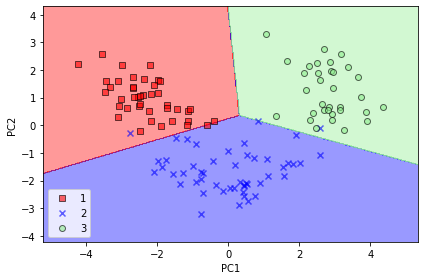

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
X_trian_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

/var/folders/tl/3mcdykwx5g145dz_cpc1vdxc0000gn/T/ipykernel_79576/1341771559.py:15: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y = X[y==cl, 1], alpha=0.6, color=cmap(idx), edgecolor='black', marker=markers[idx], label=cl)


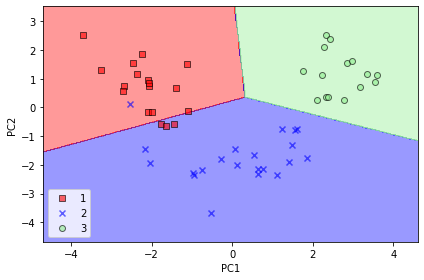

In [65]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [66]:
pca =PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [67]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label-1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [68]:
d  =13
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_train_std[y_train==label]:
        row, mv = row.reshape(d,1), mv.reshape(d,1)
        class_scatter += (row -mv).dot((row-mv).T)
    S_W += class_scatter
    
print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [69]:
print('Class label distribution: %s' % np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


In [71]:
d = 13
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter

print('Scaled within-class scatter matrix: %sx%s'  %(S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [72]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13
S_B = np.zeros((d,d))
for i , mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i +1, :].shape[0]
    mean_vec = mean_vec.reshape(d,1)
    mean_overall = mean_overall.reshape(d,1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall). T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 13x13


In [73]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [79]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key = lambda k:k[0], reverse=True)
print('Eigenvalues in descending order: \n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order: 

349.61780890599397
172.7615221897938
3.2408058667989877e-14
2.842170943040401e-14
2.525003131722881e-14
2.525003131722881e-14
1.7305705389846235e-14
1.7011368381160403e-14
1.4465403123928443e-14
1.4465403123928443e-14
4.462490677759783e-15
4.462490677759783e-15
3.7872569513332085e-15


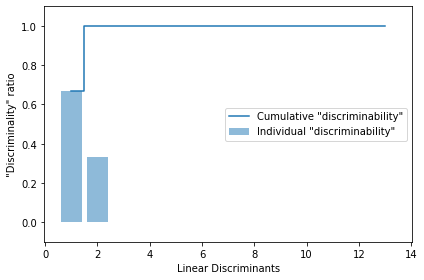

In [80]:
tot = sum(eigen_vals.real)
discr = [(i/ tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1,14), discr, alpha=0.5, align='center', label='Individual "discriminability"')
plt.step(range(1,14), cum_discr, where='mid', label='Cumulative "discriminability"')
plt.ylabel('"Discriminality" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [81]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W: \n', w)

Matrix W: 
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


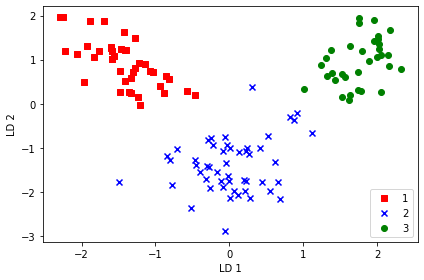

In [82]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0], X_train_lda[y_train == l,1 ] * (-1), c=c, label=l, marker=m)
    
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [85]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

/var/folders/tl/3mcdykwx5g145dz_cpc1vdxc0000gn/T/ipykernel_79576/1341771559.py:15: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y = X[y==cl, 1], alpha=0.6, color=cmap(idx), edgecolor='black', marker=markers[idx], label=cl)


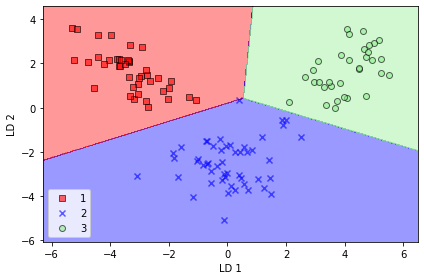

In [86]:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

/var/folders/tl/3mcdykwx5g145dz_cpc1vdxc0000gn/T/ipykernel_79576/1341771559.py:15: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y = X[y==cl, 1], alpha=0.6, color=cmap(idx), edgecolor='black', marker=markers[idx], label=cl)


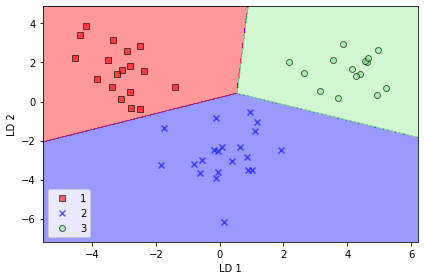

In [87]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [97]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as  np

def rbf_kernel_pca(X, gamma, n_components):
    sq_dists = pdist(X, 'sqeuclidean')
    print('sq_dist: ', sq_dists)
    mat_sq_dists = squareform(sq_dists)
    print('mat_sq_dists: ', mat_sq_dists)
    
    K=exp(-gamma * mat_sq_dists)
    N = K.shape[0]
    
    one_n = np.ones((N, N)) / N 
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1] 
    
    X_pc = np.column_stack((eigvecs[:, i] for i in range(n_components)))
    
    return X_pc
    

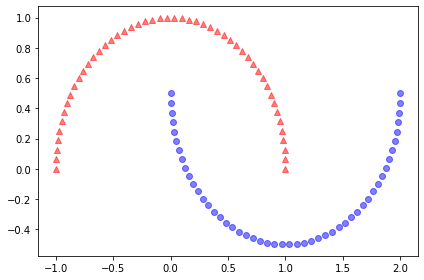

In [98]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red' , marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue' , marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

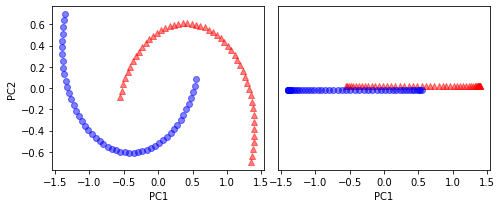

In [99]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1)) + 0.02,  color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0],np.zeros((50,1)) -0.02,  color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

sq_dist:  [0.9256 1.1192 1.4309 ... 2.7423 1.5423 2.192 ]
mat_sq_dists:  [[0.     0.9256 1.1192 ... 0.3238 1.2405 0.8674]
 [0.9256 0.     0.5633 ... 1.8737 1.6808 0.0654]
 [1.1192 0.5633 0.     ... 2.621  0.3972 0.9632]
 ...
 [0.3238 1.8737 2.621  ... 0.     2.7423 1.5423]
 [1.2405 1.6808 0.3972 ... 2.7423 0.     2.192 ]
 [0.8674 0.0654 0.9632 ... 1.5423 2.192  0.    ]]


/var/folders/tl/3mcdykwx5g145dz_cpc1vdxc0000gn/T/ipykernel_79576/1520874994.py:12: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K=exp(-gamma * mat_sq_dists)
/var/folders/tl/3mcdykwx5g145dz_cpc1vdxc0000gn/T/ipykernel_79576/1520874994.py:21: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X_pc = np.column_stack((eigvecs[:, i] for i in range(n_components)))


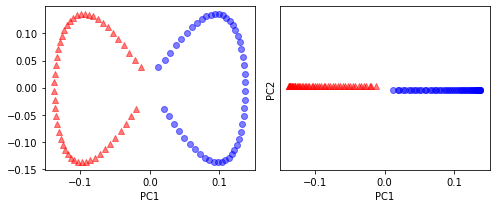

In [100]:
from matplotlib.ticker import  FormatStrFormatter
X_kpca = rbf_kernel_pca(X, gamma = 15, n_components=2)
fig, ax = plt.subplots(nrows =1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1)) - 0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

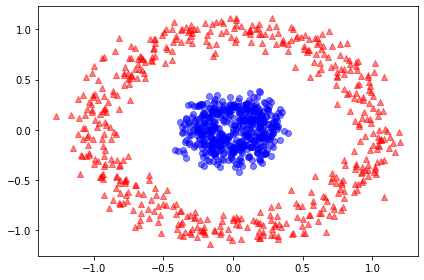

In [101]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show()

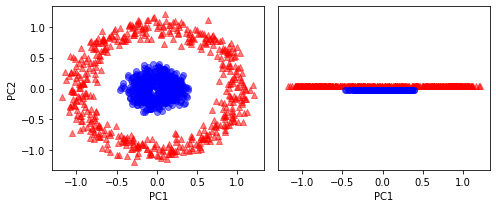

In [102]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y ==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y ==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y ==0, 0], np.zeros((500,1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y ==1, 0], np.zeros((500,1)) - 0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([
    -1,1
])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

sq_dist:  [0.8525 1.2373 1.0483 ... 0.1777 1.3014 1.2036]
mat_sq_dists:  [[0.     0.8525 1.2373 ... 4.4488 4.3537 0.9826]
 [0.8525 0.     2.6897 ... 3.6185 2.8813 0.7953]
 [1.2373 2.6897 0.     ... 2.2309 2.8688 0.85  ]
 ...
 [4.4488 3.6185 2.2309 ... 0.     0.1777 1.3014]
 [4.3537 2.8813 2.8688 ... 0.1777 0.     1.2036]
 [0.9826 0.7953 0.85   ... 1.3014 1.2036 0.    ]]


/var/folders/tl/3mcdykwx5g145dz_cpc1vdxc0000gn/T/ipykernel_79576/1520874994.py:12: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K=exp(-gamma * mat_sq_dists)
/var/folders/tl/3mcdykwx5g145dz_cpc1vdxc0000gn/T/ipykernel_79576/1520874994.py:21: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X_pc = np.column_stack((eigvecs[:, i] for i in range(n_components)))


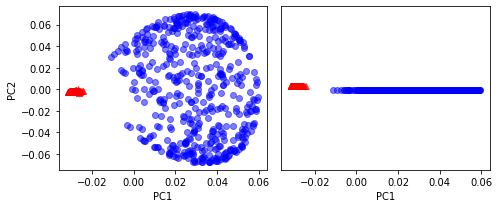

In [104]:
X_kpca = rbf_kernel_pca(X, gamma = 15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y ==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y ==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1)) - 0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
plt.tight_layout()
plt.show()

In [105]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as  np

def rbf_kernel_pca(X, gamma, n_components):
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    
    K=exp(-gamma * mat_sq_dists)
    N = K.shape[0]
    
    one_n = np.ones((N, N)) / N 
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1] 
    
    alphas = np.column_stack([eigvecs[:, i] for i in range(n_components)])
    
    lambdas = [eigvals[i] for i in range(n_components)]

    return alphas, lambdas


    

In [106]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma = 15, n_components=1)

/var/folders/tl/3mcdykwx5g145dz_cpc1vdxc0000gn/T/ipykernel_79576/2766889236.py:10: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K=exp(-gamma * mat_sq_dists)


In [108]:
x_new = X[25]
x_new

array([1.8713, 0.0093])

In [109]:
x_proj = alphas[25]
x_proj

array([0.0788])

In [110]:
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new - row)**2) for row in X])
    print(pair_dist)
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

In [111]:
x_reproj = project_x(x_new, X, gamma = 15, alphas=alphas, lambdas=lambdas)
x_reproj

[1.2318e+00 1.5550e+00 3.2382e-01 5.3166e+00 2.4450e+00 7.5928e-01
 9.4410e-01 3.7426e+00 3.9717e-01 8.7698e-01 4.1241e+00 2.1920e+00
 8.5577e-01 2.8096e+00 4.3634e+00 7.8659e+00 7.5302e-01 7.3397e+00
 3.2470e+00 9.6321e-01 6.8209e+00 3.6882e-02 3.1919e+00 5.5490e+00
 5.9999e+00 0.0000e+00 1.4617e-01 1.3551e+00 3.5229e+00 7.7538e+00
 3.6510e+00 4.1092e-03 6.4262e+00 1.6808e+00 1.9806e-01 6.5410e-02
 6.5410e-02 1.4617e-01 2.5691e+00 1.8005e+00 3.4192e+00 1.6420e-02
 7.1775e+00 2.9251e+00 7.6578e-01 1.0749e+00 1.6401e+00 5.6330e-01
 2.1539e+00 3.4367e+00 2.5459e+00 4.8428e+00 3.6762e+00 8.1174e+00
 1.0258e+00 1.9806e-01 5.7771e+00 8.0480e+00 1.3093e+00 7.9641e+00
 2.3455e+00 3.6882e-02 2.9700e+00 1.9720e+00 3.8863e+00 1.4914e+00
 3.0368e+00 1.4309e+00 2.3192e+00 8.2475e-01 7.6285e+00 6.6279e+00
 5.0809e+00 3.6028e+00 1.1219e+00 8.2357e+00 2.6907e+00 1.6420e-02
 2.5736e-01 7.4902e+00 7.8764e-01 1.9359e+00 3.3446e+00 8.2446e+00
 1.8080e+00 4.7711e-01 7.0044e+00 6.5540e-01 1.0189e-01 4.6033

array([0.0788])

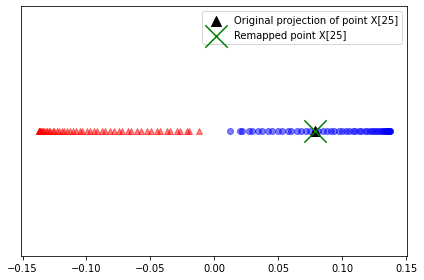

In [112]:
plt.scatter(alphas[y==0, 0], np.zeros((50)),  color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)), color='blue', marker='o', alpha=0.5)
plt.scatter(x_proj, 0, color='black', label='Original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green', label='Remapped point X[25]', marker='x', s=500)
plt.yticks([], [])
plt.legend(scatterpoints=1)
plt.tight_layout()
plt.show()

In [113]:
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)
scikit_pca=KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_pca.fit_transform(X)

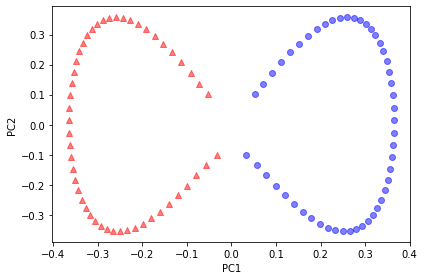

In [114]:
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1,1], color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()